Good afternoon my name is Asher and my project is on Electric Vehicle usage. I got my data from data.gov, and it lists how many electric vehicles are used in each county and state. I was interested in seeing which type of electric vehicles, battery-electric and plug-in hybrids, were more popular. And I was also interested in seeing which regions and how overall popular electric vehicles are compared to non-electric ones. All the data is gathered from 2017 to March 2025

In [2]:
# Importing the necessary tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Imported os to change working directory
import os
print(os.getcwd()) 

/Users/asherscott


In [18]:
#Double checking that it worked
os.chdir("/Users/asherscott/Desktop/Data 4Fun")
print(os.getcwd())

/Users/asherscott/Desktop/Data 4Fun


In [20]:
#Calling in csv file
Electric = pd.read_csv("Electric_Vehicles.csv")
print(Electric)

                   Date          County State Vehicle Primary Use  \
0      November 30 2021         Douglas    CO           Passenger   
1       January 31 2023     Plaquemines    LA           Passenger   
2        August 31 2020         Loudoun    VA           Passenger   
3        August 31 2017           Mason    WA               Truck   
4          June 30 2022             Lee    FL           Passenger   
...                 ...             ...   ...                 ...   
26481  February 29 2024  Virginia Beach    VA               Truck   
26482      June 30 2019           Grant    WA               Truck   
26483       May 31 2023        Rockdale    GA           Passenger   
26484    August 31 2023         Stevens    WA           Passenger   
26485    August 31 2017           Essex    MA           Passenger   

       Battery Electric Vehicles (BEVs)  \
0                                     1   
1                                     1   
2                                     1   

In [22]:
#Removing NAs
Electric = Electric.dropna()
print(Electric)

                   Date          County State Vehicle Primary Use  \
0      November 30 2021         Douglas    CO           Passenger   
1       January 31 2023     Plaquemines    LA           Passenger   
2        August 31 2020         Loudoun    VA           Passenger   
3        August 31 2017           Mason    WA               Truck   
4          June 30 2022             Lee    FL           Passenger   
...                 ...             ...   ...                 ...   
26481  February 29 2024  Virginia Beach    VA               Truck   
26482      June 30 2019           Grant    WA               Truck   
26483       May 31 2023        Rockdale    GA           Passenger   
26484    August 31 2023         Stevens    WA           Passenger   
26485    August 31 2017           Essex    MA           Passenger   

       Battery Electric Vehicles (BEVs)  \
0                                     1   
1                                     1   
2                                     1   

In [26]:
#Reorganized the data to date format and checked with head function
# Convert 'Date' column to datetime format
Electric['Date'] = pd.to_datetime(Electric['Date'])

# Create new columns for Month, Day, and Year
Electric['Month'] = Electric['Date'].dt.month_name()  # Full month name
Electric['Day'] = Electric['Date'].dt.day
Electric['Year'] = Electric['Date'].dt.year

Electric['Date'] = pd.to_datetime(Electric['Date'])
print(Electric[["Date", "Year", "Month"]].head())

        Date  Year     Month
0 2021-11-30  2021  November
1 2023-01-31  2023   January
2 2020-08-31  2020    August
3 2017-08-31  2017    August
4 2022-06-30  2022      June


In [40]:
#Shortened the column names for easier use
Electric = Electric.rename(columns={
    "Battery Electric Vehicles (BEVs)": "BEVs",
    "Plug-In Hybrid Electric Vehicles (PHEVs)": "PHEVs",
    "Non-Electric Vehicle Total": "Non Evs Total",
    "Electric Vehicle (EV) Total": "Total Evs"
})

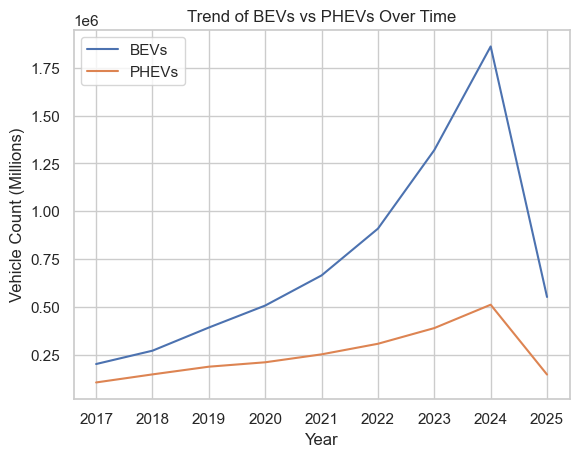

In [42]:
#Created a line graph showing the differences in a number of BEVs and PHEvs from 2017 to Present
sns.set_theme(style="whitegrid")
yearly = Electric.groupby('Year')[['BEVs', 'PHEVs']].sum().reset_index()

sns.lineplot(data=yearly, x='Year', y='BEVs', label='BEVs')
sns.lineplot(data=yearly, x='Year', y='PHEVs', label='PHEVs')
plt.title("Trend of BEVs vs PHEVs Over Time")
plt.ylabel("Vehicle Count (Millions)")
plt.show()

In [44]:
#Dividing the states into Regions for better comparisons
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Mid-Atlantic': ['DE', 'MD', 'VA','DC'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['FL', 'GA', 'NC', 'SC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX',],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']}

#Adding it to my Elctric dataframe 
state_to_region = {}
for region, states in regions.items():
    for state in states:
        state_to_region[state] = region

Electric['Region'] = Electric['State'].map(state_to_region)
print(Electric[["Region"]].head())


         Region
0          West
1         South
2  Mid-Atlantic
3          West
4         South


In [46]:
#I Grouped by region and simport matplotlib.pyplot as plt
region_ev_total = Electric.groupby('Region')['Total EVs'].sum()

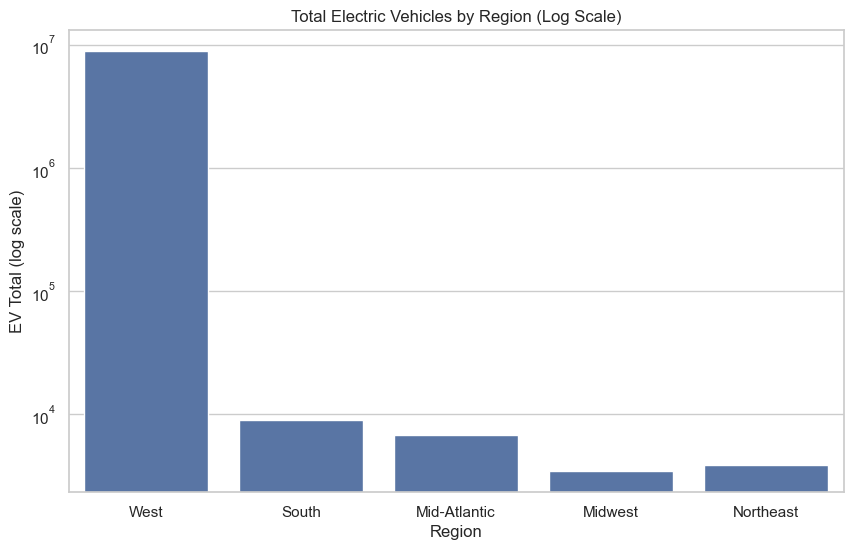

In [48]:
#Made a bar chart for EV Total by region using log scale
plt.figure(figsize=(10, 6))
sns.barplot(data=Electric, x="Region", y="Total EVs", estimator=sum, errorbar=None)
plt.yscale("log")  # Compresses the y-axis scale
plt.title("Total Electric Vehicles by Region (Log Scale)")
plt.ylabel("EV Total (log scale)")
plt.show()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5259
           1       1.00      1.00      1.00        39

    accuracy                           1.00      5298
   macro avg       1.00      1.00      1.00      5298
weighted avg       1.00      1.00      1.00      5298



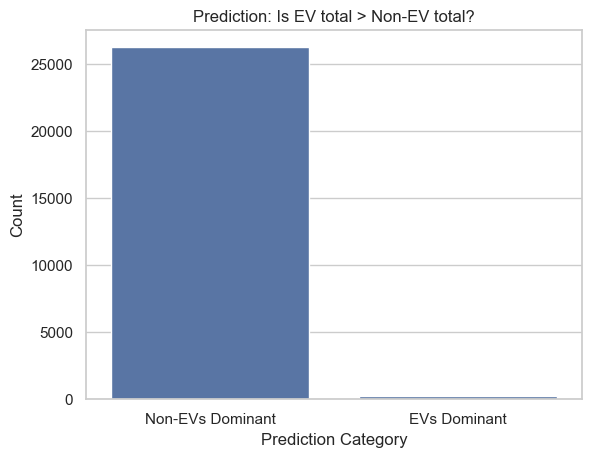

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
Electric = pd.read_csv("Electric_Vehicles.csv")
Electric = Electric.rename(columns={
    "Battery Electric Vehicles (BEVs)": "BEVs",
    "Plug-In Hybrid Electric Vehicles (PHEVs)": "PHEVs",
    "Non-Electric Vehicle Total": "Non Evs Total",
    "Electric Vehicle (EV) Total": "Total Evs"
})

# Dropped rows with missing values
Electric.dropna(subset=["Total Evs", "Non Evs Total"], inplace=True)

# Created a binary target: 1 if EVs exceed Non-EVs, 0 otherwise
Electric["EV_Dominant"] = (Electric["Total Evs"] > Electric["Non Evs Total"]).astype(int)

# Features and target
X = Electric[["Total Evs", "Non Evs Total"]]
y = Electric["EV_Dominant"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Bar plot of predictions
Electric["Predicted"] = model.predict(X)
sns.countplot(x="Predicted", data=Electric)
plt.title("Prediction: Is EV total > Non-EV total?")
plt.xticks([0, 1], ["Non-EVs Dominant", "EVs Dominant"])
plt.ylabel("Count")
plt.xlabel("Prediction Category")
plt.show()

In [58]:
y_proba = model.predict_proba(X_test)
print("\nPredicted probabilities:\n", y_proba[:5])


Predicted probabilities:
 [[1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.57502124e-48]
 [1.00000000e+00 1.20686571e-18]
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]]


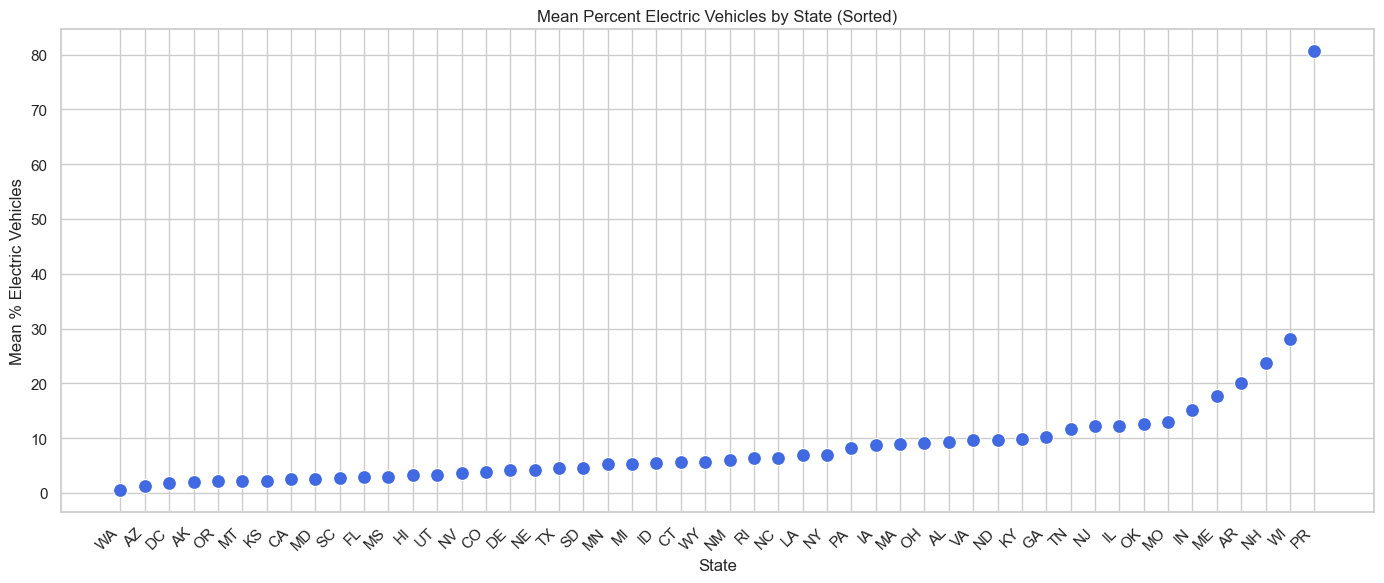

In [66]:
#Group by State and calculate mean Percent Electric Vehicles
state_means = Electric.groupby("State")["Percent Electric Vehicles"].mean().reset_index()

# Sort by Percent Electric Vehicles
state_means = state_means.sort_values(by="Percent Electric Vehicles")

#Made a Scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=state_means, x="State", y="Percent Electric Vehicles", s=100, color="royalblue")
plt.xticks(rotation=45, ha='right')
plt.title("Mean Percent Electric Vehicles by State (Sorted)")
plt.ylabel("Mean % Electric Vehicles")
plt.xlabel("State")
plt.tight_layout()
plt.show()